In [22]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [23]:
train_path = 'C:/Users/User/Desktop/Fruit_Classification/Dataset/train'
test_path = 'C:/Users/User/Desktop/Fruit_Classification/Dataset/test'

Dataset from : https://www.kaggle.com/datasets/mbkinaci/fruit-images-for-object-detection

### Train

In [24]:
train_img = []
train_lab = []

for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        train_lab.append(filename.split('_')[0])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(200,200))
        train_img.append(img)


In [25]:
train_img[0].shape

(200, 200, 3)

In [26]:
for ele in range(len(train_img)):
    train_img[ele] = train_img[ele] / 255.
train_img[0].shape

(200, 200, 3)

In [27]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

train_lab = np.array(train_lab)

label_encoder = LabelEncoder()
Ytrain = label_encoder.fit_transform(train_lab)

In [28]:
Xtrain = np.array(train_img)

In [29]:
Xtrain.shape

(240, 200, 200, 3)

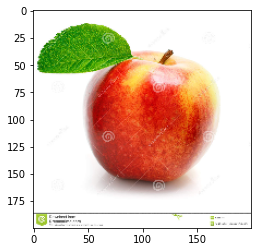

In [30]:
plt.imshow(Xtrain[np.random.randint(0,240)])

In [31]:
del(train_lab)
del(train_img)

In [32]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(200,200,3)))
model.add(tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(64,(2,2),padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(64,(2,2),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'],optimizer='sgd')

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 100, 100, 64)      8256      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 64)      16448     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 160000)           

In [34]:
history = model.fit(Xtrain, Ytrain, epochs=200)

Epoch 1/200
8/8 [==============================] - 1s 79ms/step - loss: 1.3130 - acc: 0.3417
Epoch 2/200
8/8 [==============================] - 1s 76ms/step - loss: 1.3495 - acc: 0.4417
Epoch 3/200
8/8 [==============================] - 1s 77ms/step - loss: 1.2686 - acc: 0.3875
Epoch 4/200
8/8 [==============================] - 1s 78ms/step - loss: 1.2351 - acc: 0.4042
Epoch 5/200
8/8 [==============================] - 1s 76ms/step - loss: 1.1778 - acc: 0.5292
Epoch 6/200
8/8 [==============================] - 1s 76ms/step - loss: 1.2826 - acc: 0.4167
Epoch 7/200
8/8 [==============================] - 1s 77ms/step - loss: 1.1184 - acc: 0.6417
Epoch 8/200
8/8 [==============================] - 1s 78ms/step - loss: 1.0297 - acc: 0.6292
Epoch 9/200
8/8 [==============================] - 1s 79ms/step - loss: 0.9794 - acc: 0.6250
Epoch 10/200
8/8 [==============================] - 1s 78ms/step - loss: 1.0026 - acc: 0.6250
Epoch 11/200
8/8 [==============================] - 1s 77ms/step - lo

Text(0.5, 1.0, 'acc')

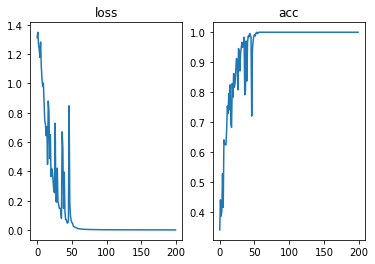

In [35]:

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.title('loss')
plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.title('acc')

### Test

In [36]:
test_img = []
test_lab = []

for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        test_lab.append(filename.split('_')[0])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(200,200))
        test_img.append(img)

In [37]:
for ele in range(len(test_img)):
    test_img[ele] = test_img[ele] / 255.
test_img[0].shape

(200, 200, 3)

In [38]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

test_lab = np.array(test_lab)

label_encoder = LabelEncoder()
Ytest = label_encoder.fit_transform(test_lab)

In [39]:
Xtest = np.array(test_img)

In [40]:
ypred = model.predict(Xtest)
print("Score:",np.sum(ypred.argmax(axis=1) == Ytest)/len(ypred))

Score: 0.7666666666666667


In [41]:
oneHotKey = { 0:'apple',1:'banana',2:'mixed',3:'orange'}
ypred_map = []
for i in range(len(Xtest)):
    ypred_map.append(oneHotKey[np.argmax(ypred[i])])

Actual: apple
Predict: apple


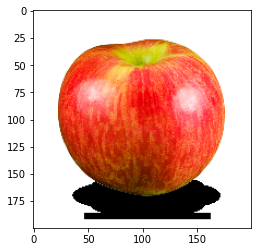

In [43]:
rand_index = np.random.randint(0,len(ypred_map))
print("Actual:",ypred_map[rand_index])
print("Predict:",oneHotKey[Ytest[rand_index]])
plt.imshow(Xtest[rand_index])